# Flight Price Prediction

In [154]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00


In [178]:
# Import necessary libraries

import pandas as pd # for data manipulation and analysis
import numpy as np # for fast mathematical operations
import matplotlib.pyplot as plt # for visualization and plots
import seaborn as sns # for statistical data visualization
from scipy import stats # for statistical analysis
from ydata_profiling import ProfileReport # for exploratory data analysis

from sklearn.model_selection import train_test_split # for splitting dataset into training and testing subsets
from sklearn.preprocessing import LabelEncoder # to convert categorical data (text labels) into numeric form

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("Libraries imported successfully!")

Libraries imported successfully!


## Dataset Description

**Source:** Kaggle  
**Dataset Name:** Flight Price Prediction  
**URL:** https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

This dataset contains information about flight booking options from the website "Ease My Trip" for travel between India's top 6 metro cities.

It includes features such as airline, flight code, source and destination cities, departure and arrival times, number of stops, class, duration, and ticket price.

### Load the dataset

Download the dataset from https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

The dataset will contain 2 files: business.csv, economy.csv and Clean_Dataset.csv

Upload these files to the same directory as this notebook (root dir on collab files).

In [84]:
# Load and inspect all dataset files

import pandas as pd
import numpy as np

print("Loading datasets...")
print("\n" + "="*80)

business_dataset_filename = 'business.csv'
economy_dataset_filename = 'economy.csv'
clean_dataset_filename = 'Clean_Dataset.csv'

try:
    business_df = pd.read_csv(business_dataset_filename)
    print(f"{business_dataset_filename} is loaded: {business_df.shape[0]} rows, {business_df.shape[1]} columns")
    print(f"Sample data:")
    display(business_df.head(3))
    print("\n")
except FileNotFoundError:
    print(f"{business_dataset_filename} not found")
    raise

try:
    economy_df = pd.read_csv(economy_dataset_filename)
    print(f"{economy_dataset_filename} is loaded: {economy_df.shape[0]} rows, {economy_df.shape[1]} columns")
    print(f"Sample data:")
    display(economy_df.head(3))
    print("\n")
except FileNotFoundError:
    print(f"{economy_dataset_filename} not found")
    raise

try:
    clean_df = pd.read_csv(clean_dataset_filename)
    df = clean_df
    print(f"{clean_dataset_filename} is loaded: {clean_df.shape[0]} rows, {clean_df.shape[1]} columns")
    print(f"Sample data:")
    display(clean_df.head(3))
    print("\n")
except FileNotFoundError:
    print(f"{clean_dataset_filename} not found")
    raise

print("\n" + "="*80)
print(f"Total rows in {business_dataset_filename} and {economy_dataset_filename} combined:",
      business_df.shape[0] + economy_df.shape[0])
print(f"vs. rows in {clean_dataset_filename}: {clean_df.shape[0]}")

Loading datasets...

business.csv is loaded: 93487 rows, 11 columns
Sample data:


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"




economy.csv is loaded: 206774 rows, 11 columns
Sample data:


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"




Clean_Dataset.csv is loaded: 300153 rows, 12 columns
Sample data:


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956





Total rows in business.csv and economy.csv combined: 300261
vs. rows in Clean_Dataset.csv: 300153


The original includes has 3 CSV files:

1. business.csv: 93487 rows, 11 columns
   - Contains only business class flights
   - Represents ~31% of total data
   - Higher prices expected

2. economy.csv: 206774 rows, 11 columns  
   - Contains only ECONOMY class flights
   - Represents ~69% of total data
   - Lower prices expected
   - More than 2 times the business data (imbalanced)

3. Clean_Dataset.csv: 300153 rows, 12 columns
   - Combined dataset (business + economy data merged)
   - Excluded 108 rows from initial data (300261 raw dataset vs. 300153 raws in clean dataset)
   - This is a cleaned version, not just a simple merge
   - Has one extra column (12 vs. 11) - "Unnamed" column plays role of ID

In the next sections I will only inspect cleaned dataset (Clean_Dataset.csv).

### Dataset Structure and Attributes

In [162]:
# Display dataset data types and info

print("Dataset Information:")
print("="*80)

clean_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [115]:
# summary DataFrame
attribute_summary = pd.DataFrame({
    'Attribute': clean_df.columns,
    'Data Type': clean_df.dtypes.values,
    'Count': clean_df.count().values,
    'Null Count': clean_df.isnull().sum().values,
    'Unique Values': [clean_df[col].nunique() for col in clean_df.columns],
    'Min':  [clean_df[col].min() if clean_df[col].dtype in ['int64', 'float64'] else '-'
            for col in clean_df.columns],
    'Max':  [clean_df[col].max() if clean_df[col].dtype in ['int64', 'float64'] else '-'
            for col in clean_df. columns]
})

print("\n" + "="*80)
print("Attribute Summary")
print("="*80)
attribute_summary


Attribute Summary


,Attribute,Data Type,Count,Null Count,Unique Values,Min,Max
0,Unnamed: 0,int64,300153,0,300153,0,300152
1,airline,object,300153,0,6,-,-
2,flight,object,300153,0,1561,-,-
3,source_city,object,300153,0,6,-,-
4,departure_time,object,300153,0,6,-,-
5,stops,object,300153,0,3,-,-
6,arrival_time,object,300153,0,6,-,-
7,destination_city,object,300153,0,6,-,-
8,class,object,300153,0,2,-,-
9,duration,float64,300153,0,476,0.83,49.83


In [163]:

# Display unique values

print("\nUnique values in airline column")
print(clean_df['airline'].unique())

print("\nUnique values in source_city column")
print(clean_df['source_city'].unique())

print("\nUnique values in departure_time column")
print(clean_df['departure_time'].unique())

print("\nUnique values in stops column")
print(clean_df['stops'].unique())

print("\nUnique values in arrival_time column")
print(clean_df['arrival_time'].unique())

print("\nUnique values in destination_city column")
print(clean_df['destination_city'].unique())

print("\nUnique values in class column")
print(clean_df['class'].unique())

print("\nUnique values in days_left column")
print(clean_df['days_left'].unique())


Unique values in airline column
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

Unique values in source_city column
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

Unique values in departure_time column
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

Unique values in stops column
['zero' 'one' 'two_or_more']

Unique values in arrival_time column
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

Unique values in destination_city column
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

Unique values in class column
['Economy' 'Business']

Unique values in days_left column
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]


Attribute categories in dataset:
- `Unnamed: 0` - Index column
- `airline` - Airline company name (6 unique airlines)
- `flight` - Flight code/number (1561 unique flights)
- `source_city` - Departure city (6 unique cities)
- `departure_time` - Time of day category for departure (string, 6 time slots)
- `stops` - Number of stops: zero, one, or two_or_more (3 categories)
- `arrival_time` - Time of day category for arrival (dtring, 6 time slots)
- `destination_city` - Arrival city (6 unique cities)
- `class` - Flight class:  Business or Economy (2 categories)  
- `duration` - Flight duration in hours (float, 476 unique values)
- `days_left` - Days remaining until departure (integer in range 1-49)
- `price` - Flight ticket price (integer, in indian currency - indian rupee, INR, रू)


## Exploratory Data Analysis


In [140]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if 'Unnamed' not in col]

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [165]:
# Descriptive statistics for numerical features

print("Descriptive statistics for numerical features")
print("="*80)
clean_df.describe().T

Descriptive statistics for numerical features


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.00,150076.00,86646.85,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.00,12.22,7.19,0.83,6.83,11.25,16.17,49.83
days_left,300153.00,26.00,13.56,1.00,15.00,26.00,38.00,49.00
price,300153.00,20889.66,22697.77,1105.00,4783.00,7425.00,42521.00,123071.00


In [166]:
# Categorical features summary

print("Categorical features summary")
print("="*80)

for col in categorical_cols:
    print(f"\nColumn {col}:")
    print(f"\tUnique values: {clean_df[col]. nunique()}")
    print(f"\tMost common:  {clean_df[col].mode()[0]} (appears {clean_df[col].value_counts().iloc[0]} times)")
    print(f"\tValue counts:")
    print(clean_df[col].value_counts().head(10))
    print("-"*80)

Categorical features summary

Column airline:
	Unique values: 6
	Most common:  Vistara (appears 127859 times)
	Value counts:
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
--------------------------------------------------------------------------------

Column flight:
	Unique values: 1561
	Most common:  UK-706 (appears 3235 times)
	Value counts:
flight
UK-706    3235
UK-772    2741
UK-720    2650
UK-836    2542
UK-822    2468
UK-828    2440
UK-874    2423
UK-832    2404
UK-826    2335
UK-860    2329
Name: count, dtype: int64
--------------------------------------------------------------------------------

Column source_city:
	Unique values: 6
	Most common:  Delhi (appears 61343 times)
	Value counts:
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
--------------------------------

In [81]:
# Price distribution analysis

print("Price distribution analysis")
print("="*80)

# Mean = the sum of all values divided by the number of values.
print(f"Mean price: {clean_df['price'].mean():,.2f}")

# Meadian = the middle value when data is sorted.
print(f"Median price: {clean_df['price'].median():,.2f}")

# Standard deviation is a statistical measure that tells you how spread out
# the values in a dataset are around the average (mean).
print(f"Standard deviation: {clean_df['price'].std():,.2f}")

print(f"Min price: {clean_df['price'].min():,.2f}")
print(f"Max price: {clean_df['price'].max():,.2f}")
print(f"Range: {clean_df['price'].max() - clean_df['price'].min():,.2f}")

Price distribution analysis
Mean price: 20,889.66
Median price: 7,425.00
Standard deviation: 22,697.77
Min price: 1,105.00
Max price: 123,071.00
Range: 121,966.00


### Data Visualization

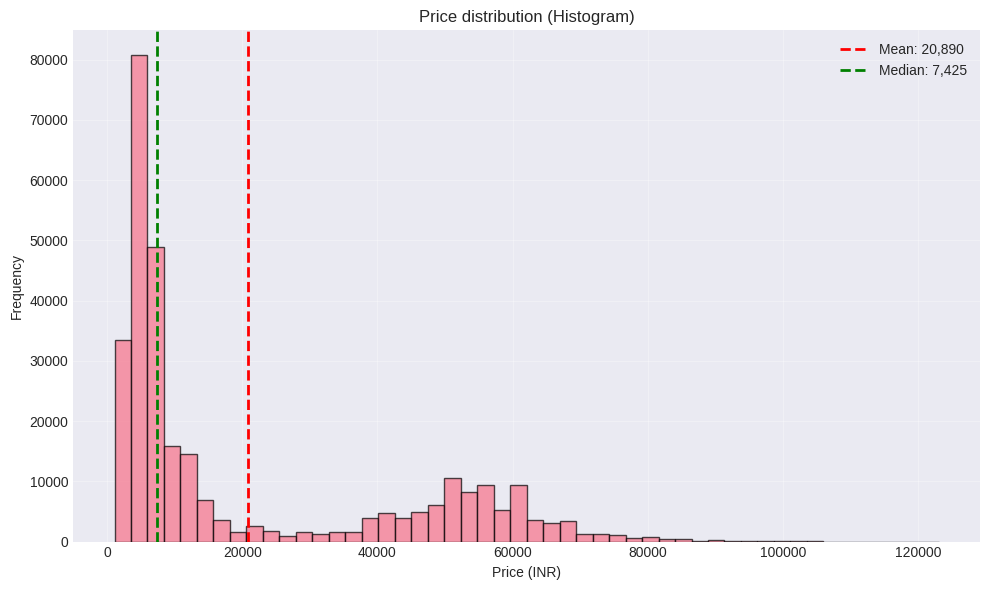

In [83]:
# Price distribution visualization

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(clean_df['price'], bins=50, edgecolor='black', alpha=0.7)
# Mean is red
ax.axvline(clean_df['price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {clean_df["price"].mean():,.0f}')
# Median is green
ax.axvline(clean_df['price'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {clean_df["price"].median():,.0f}')
ax.set_xlabel('Price (INR)')
ax.set_ylabel('Frequency')
ax.set_title('Price distribution (Histogram)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

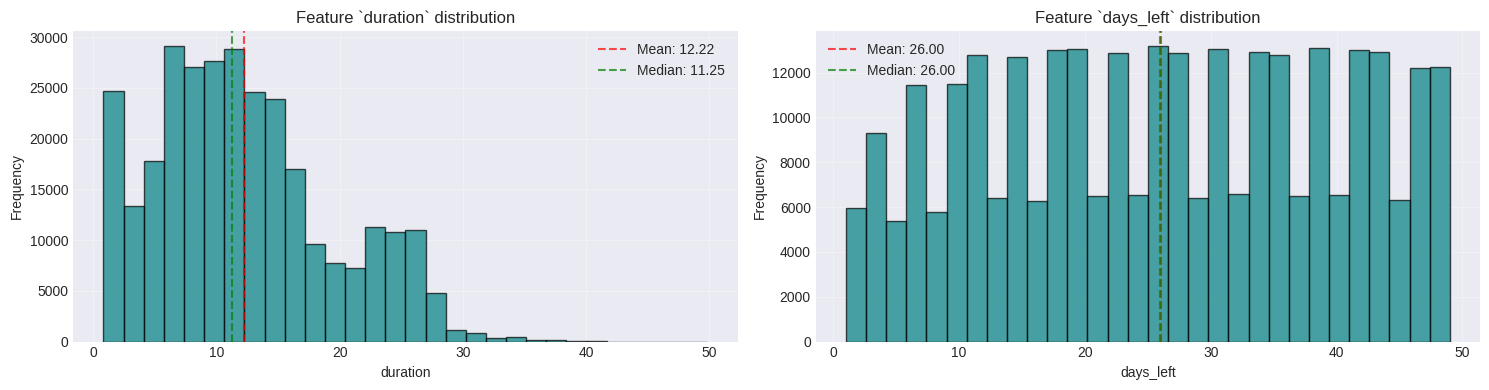

In [98]:
# Numerical features visualization (excluding price and unnamed)

numerical_cols = clean_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

num_features = [col for col in numerical_cols if col != 'price' and 'Unnamed' not in col]

n_num = len(num_features)
n_rows = (n_num + 1) // 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_num > 1 else [axes]

for idx, col in enumerate(num_features):
    axes[idx].hist(clean_df[col]. dropna(), bins=30, edgecolor='black', alpha=0.7, color='teal')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Feature `{col}` distribution')
    axes[idx].grid(True, alpha=0.3)

    # Add statistics
    mean_val = clean_df[col].mean()
    median_val = clean_df[col].median()
    # Mean is red
    axes[idx].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
    # Median is green
    axes[idx].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

# Remove empty subplots
for idx in range(n_num, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

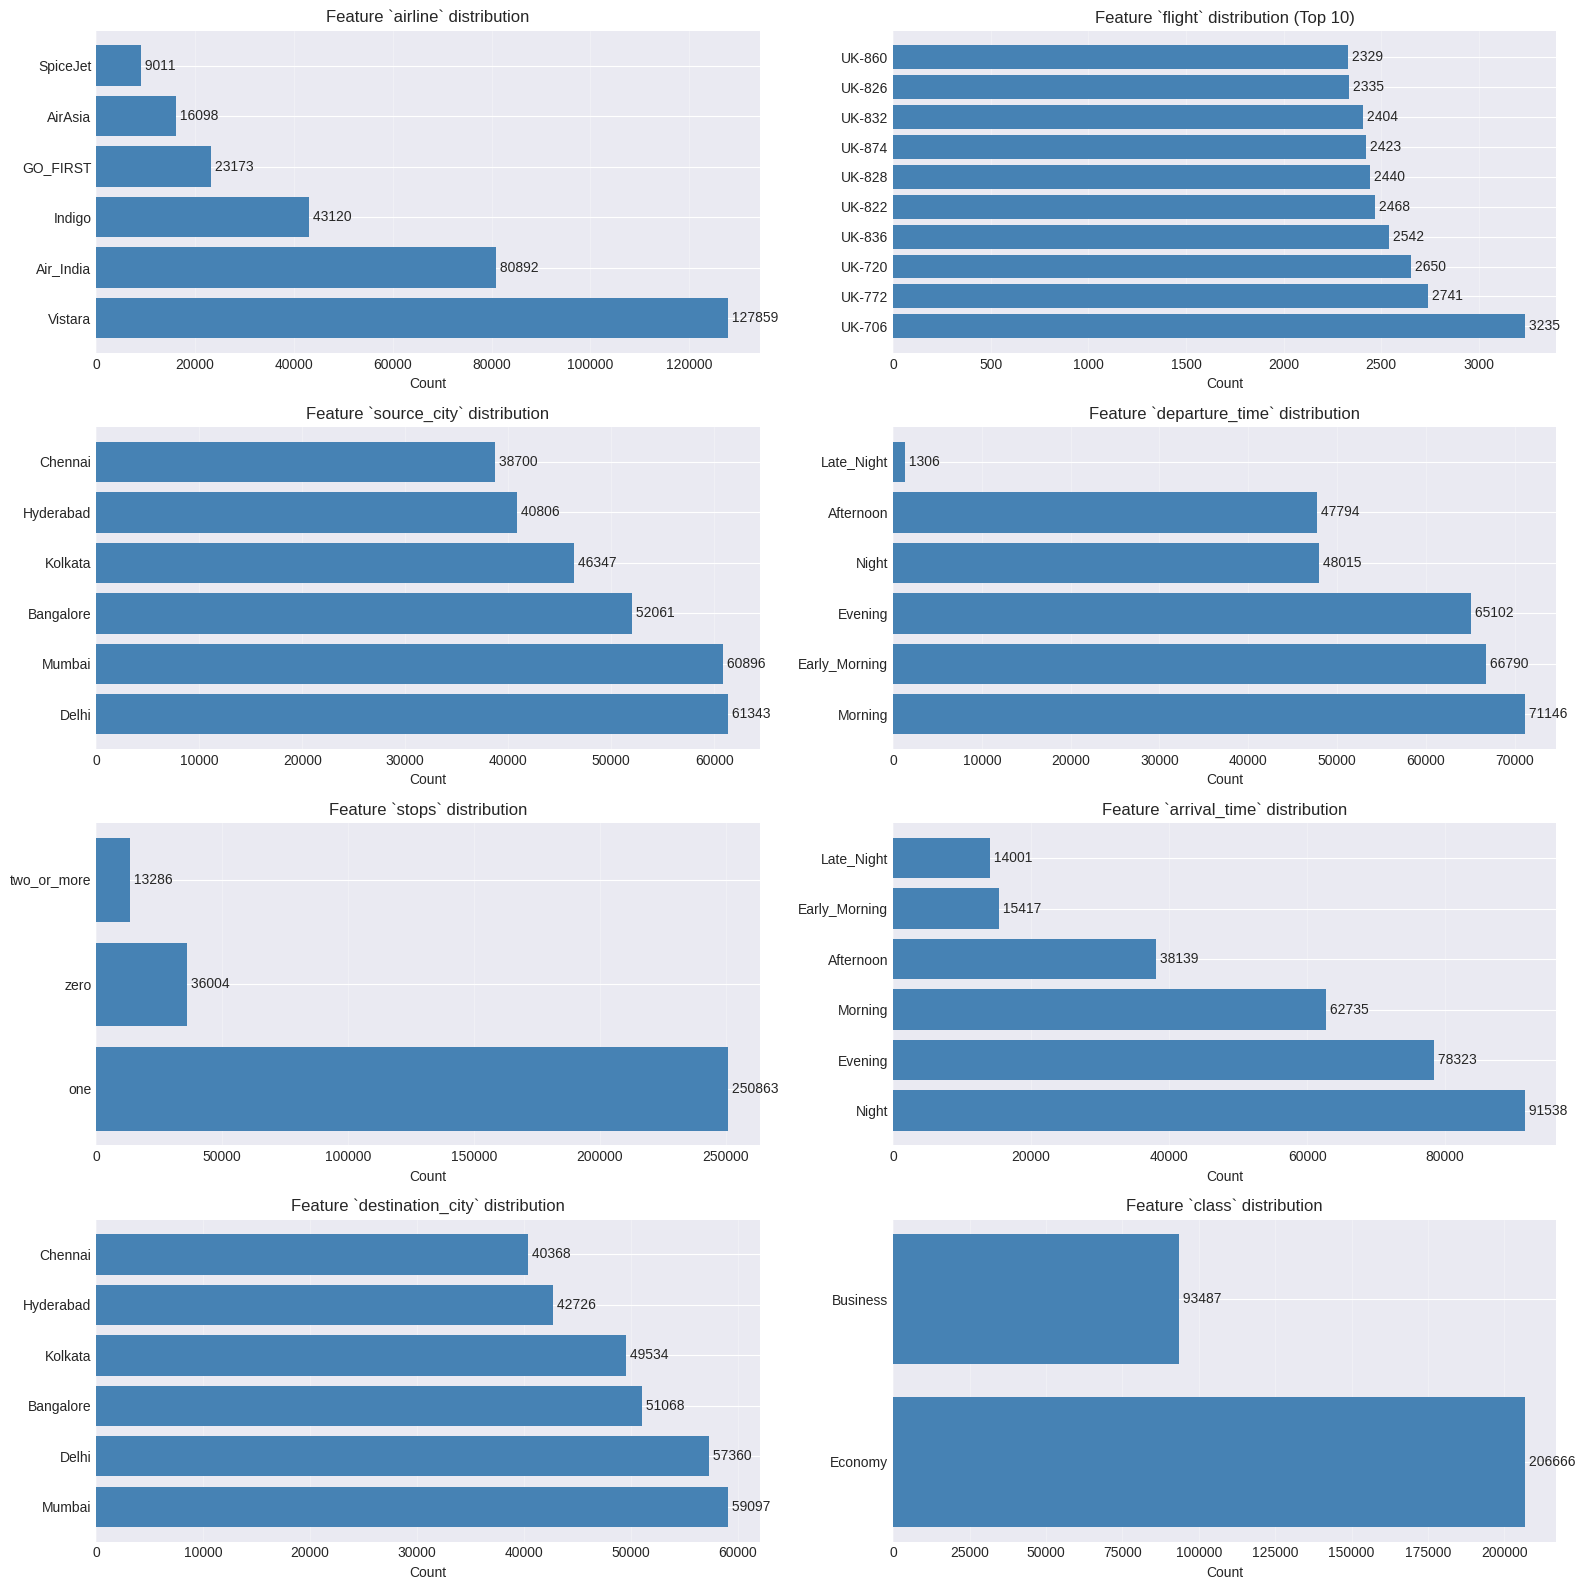

In [95]:
# Categorical features visualization

categorical_cols = clean_df.select_dtypes(include=['object']).columns.tolist()

# Determine number of categorical columns for subplot layout
n_cat = len(categorical_cols)
n_rows = (n_cat + 1) // 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() if n_cat > 1 else [axes]

for idx, col in enumerate(categorical_cols):
    value_counts = clean_df[col].value_counts()
    title_suffix = ""

    # Limit to top 15 categories if too many
    if len(value_counts) > 10:
        value_counts = value_counts.head(10)
        title_suffix = " (Top 10)"

    axes[idx].barh(value_counts.index. astype(str), value_counts.values, color='steelblue')
    axes[idx].set_xlabel('Count')
    axes[idx].set_title(f'Feature `{col}` distribution{title_suffix}')
    axes[idx].grid(True, alpha=0.3, axis='x')

    # Add value labels
    for i, v in enumerate(value_counts.values):
        axes[idx].text(v, i, f' {v}', va='center')

# Remove empty subplots
for idx in range(n_cat, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

## Dataset Issues Identification

In [142]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if 'Unnamed' not in col]

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

### Missing values

Check for null values.

In [170]:
# recap from "Dataset Structure and Attributes" stage
missing_data = pd.DataFrame({
    'Attribute': clean_df.columns,
    'Count': clean_df.count().values,
    'Missing Count': clean_df.isnull().sum().values,
})

print("Check for missing values")
print("="*80)
missing_data

Check for missing values


,Attribute,Count,Missing Count
0,Unnamed: 0,300153,0
1,airline,300153,0
2,flight,300153,0
3,source_city,300153,0
4,departure_time,300153,0
5,stops,300153,0
6,arrival_time,300153,0
7,destination_city,300153,0
8,class,300153,0
9,duration,300153,0


### Outliers Detection

Finding unusual values in data.

In [172]:
print("Outliers Detection")
print("="*80)

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lower_outliers = data[data[column] < lower_bound]
    upper_outliers = data[data[column] > upper_bound]
    outliers_count = len(lower_outliers) + len(upper_outliers)

    return {
        'column': column,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound':  lower_bound,
        'upper_bound': upper_bound,
        'lower_outliers_count': len(lower_outliers),
        'upper_outliers_count': len(upper_outliers),
        'outliers_count': outliers_count,
        'outlier_percentage': outliers_count / len(data) * 100
    }

outlier_summary = []


for col in numerical_cols:
    result = detect_outliers_iqr(clean_df, col)
    outlier_summary.append(result)

    if result['outliers_count'] > 0:
        print(f"\nColumn `{col}` outliers:")
        print(f"\tLower bound: {result['lower_bound']:.2f}")
        print(f"\t  Lower outliers: {result['lower_outliers_count']}")
        print(f"\tUpper bound: {result['upper_bound']:.2f}")
        print(f"\t  Upper outliers: {result['upper_outliers_count']}")
        # outlier_percentage < 5% is ok
        print(f"\tOutliers: {result['outliers_count']} ({result['outlier_percentage']:.2f}%)")

# outlier_df = pd.DataFrame(outlier_summary)
# print("\n" + "="*80)
# print("Outlier Summary:")
# outlier_df

Outliers Detection

Column `duration` outliers:
	Lower bound: -7.18
	  Lower outliers: 0
	Upper bound: 30.18
	  Upper outliers: 2110
	Outliers: 2110 (0.70%)

Column `price` outliers:
	Lower bound: -51824.00
	  Lower outliers: 0
	Upper bound: 99128.00
	  Upper outliers: 123
	Outliers: 123 (0.04%)


### Correlation Analysis

 Correlation analysis for numerical features
Highly Correlated Feature Pairs (|correlation| > 0.7):
	No highly correlated pairs found

Correlation Matrix:


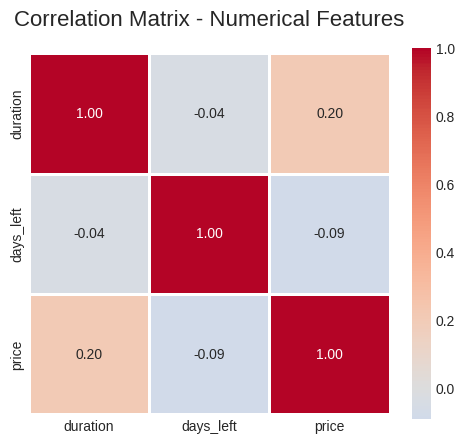

In [173]:
# Correlation Matrix

print(" Correlation analysis for numerical features")
print("="*80)

# Calculate correlation matrix
correlation_matrix = clean_df[numerical_cols].corr()



# Find highly correlated pairs
print("Highly Correlated Feature Pairs (|correlation| > 0.7):")

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    print(high_corr_df.to_string(index=False))
else:
    print("\tNo highly correlated pairs found")



# Visualize correlation matrix
print("="*80)
print("\nCorrelation Matrix:")

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
ax.set_title('Correlation Matrix - Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

### Data Imbalance Check

Data Imbalance Check

Column `airline`:
  Total unique values: 6
  Most common:  Vistara (42.6%)
  Least common: SpiceJet (3.0%)
  Imbalance ratio: 14.19: 1


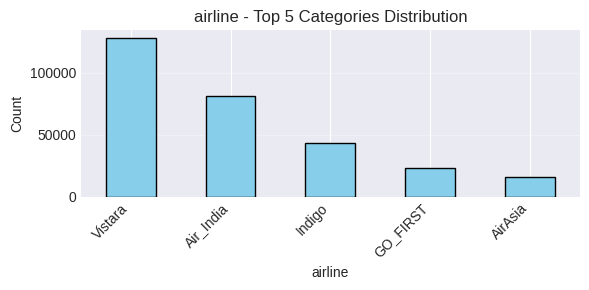

--------------------------------------------------------------------------------

Column `flight`:
  Total unique values: 1561
  Most common:  UK-706 (1.1%)
  Least common: SG-8339 (0.0%)
  Imbalance ratio: 3235.00: 1


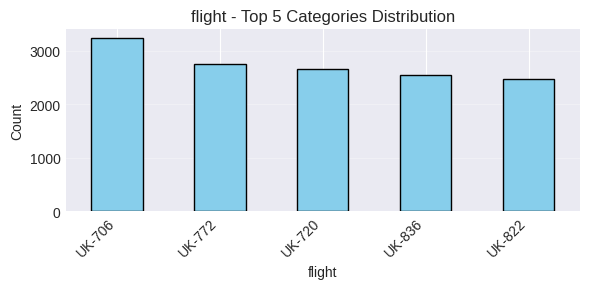

--------------------------------------------------------------------------------

Column `source_city`:
  Total unique values: 6
  Most common:  Delhi (20.4%)
  Least common: Chennai (12.9%)
  Imbalance ratio: 1.59: 1


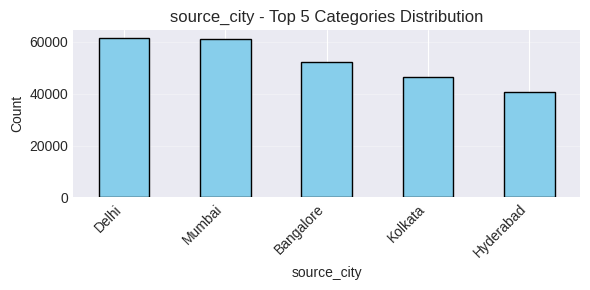

--------------------------------------------------------------------------------

Column `departure_time`:
  Total unique values: 6
  Most common:  Morning (23.7%)
  Least common: Late_Night (0.4%)
  Imbalance ratio: 54.48: 1


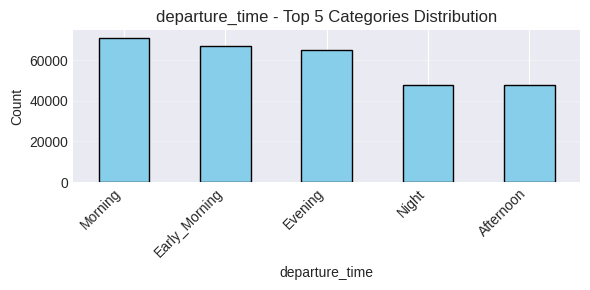

--------------------------------------------------------------------------------

Column `stops`:
  Total unique values: 3
  Most common:  one (83.6%)
  Least common: two_or_more (4.4%)
  Imbalance ratio: 18.88: 1


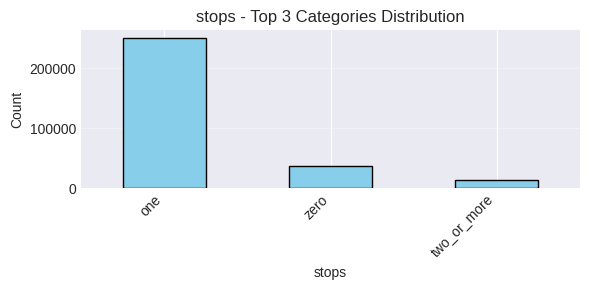

--------------------------------------------------------------------------------

Column `arrival_time`:
  Total unique values: 6
  Most common:  Night (30.5%)
  Least common: Late_Night (4.7%)
  Imbalance ratio: 6.54: 1


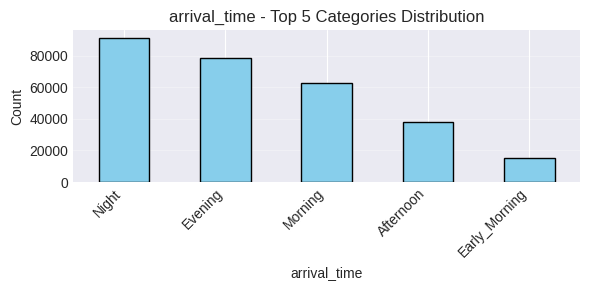

--------------------------------------------------------------------------------

Column `destination_city`:
  Total unique values: 6
  Most common:  Mumbai (19.7%)
  Least common: Chennai (13.4%)
  Imbalance ratio: 1.46: 1


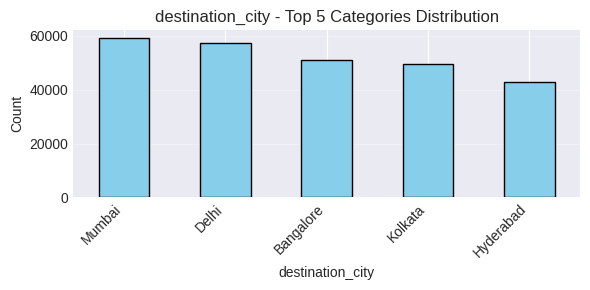

--------------------------------------------------------------------------------

Column `class`:
  Total unique values: 2
  Most common:  Economy (68.9%)
  Least common: Business (31.1%)
  Imbalance ratio: 2.21: 1
--------------------------------------------------------------------------------


In [174]:
# Check for imbalance in categorical features
print("Data Imbalance Check")
print("="*80)

for col in categorical_cols:
    value_counts = clean_df[col].value_counts()
    total = len(clean_df)

    print(f"\nColumn `{col}`:")
    print(f"  Total unique values: {len(value_counts)}")
    print(f"  Most common:  {value_counts.index[0]} ({value_counts.iloc[0]/total*100:.1f}%)")
    print(f"  Least common: {value_counts.index[-1]} ({value_counts.iloc[-1]/total*100:.1f}%)")
    print(f"  Imbalance ratio: {value_counts.iloc[0]/value_counts.iloc[-1]:.2f}: 1")

    # Visualize top categories
    if len(value_counts) > 2:
        top_n = min(5, len(value_counts))
        plt.figure(figsize=(6, 3))
        value_counts.head(top_n).plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'{col} - Top {top_n} Categories Distribution')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()

    print("-"*80)

## Automated Data Profiling (ydata-profiling)

ydata_profiling is used to automatically generate an exploratory data analysis report for a dataset


In [159]:
print("Generating ydata-profiling report...")
print("="*80)

# Generate profile report
profile = ProfileReport(
    df,
    title="Flight Price Prediction - Data Profile Report",
    explorative=True
)

# Save to HTML
output_filename = "flight_price_data_profile.html"
profile. to_file(output_filename)

print(f"Report generated successfully: {output_filename}.")

Generating ydata-profiling report...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:08<00:00,  1.50it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Report generated successfully: flight_price_data_profile.html.


In [175]:
# view ydata-profiling report
profile.to_notebook_iframe()

## Data Preprocessing

In [187]:
print("="*80)
print("Data Preprocessing")
print("="*80)
print()

# 1. Load dataset
df = pd.read_csv('Clean_Dataset.csv')
print(f"Dataseet original columns: {list(df.columns)}.\n")

# 2. Remove unnecessary columns
# Remove unnamed column (just an index, not useful for prediction)
# Remove flight number - not useful for predictions, historical data.
columns_to_drop = [col for col in df.columns if col == 'flight' or 'Unnamed' in col]

if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
    print(f"Removed columns: {columns_to_drop}.")
    print(f"Remaining columns: {list(df.columns)}.\n")

# 3. Separate target and features
# Target variable
y = df['price']
# Features (all columns except price)
X = df.drop('price', axis=1)

print(f"Target variable: price")
print(f"Features: {list(X.columns)} columns.\n")

# 4. Separate numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical features ({len(numerical_features)}):")
for feature in numerical_features:
    print(f"  - {feature}")

print(f"Categorical features ({len(categorical_features)}):")
for feature in categorical_features:
    unique_count = X[feature].nunique()
    print(f"  - {feature}:  {unique_count} unique values")

# 5. Convert categorical data (text labels) into numeric form
# Random Forest requires numerical input.
# Use Label Encoding (converts text to numbers:  0, 1, 2, ... )
# This is suitable for Random Forest (tree-based models).
# Create a copy for encoding
X_encoded = X.copy()
# Dictionary to store label encoders (needed for new data later)
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    X_encoded[feature] = le.fit_transform(X[feature])
    label_encoders[feature] = le

    print(f"\nEncoded '{feature}':")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    for original, encoded in list(mapping.items())[:3]:  # Show first 3
        print(f"\t{original} -> {encoded}")
    if len(mapping) > 3:
        print(f"\t...  ({len(mapping)} total categories)")

print(f"\nAll categorical features encoded successfully.")
print(f"\nData types after encoding:")
print(X_encoded.dtypes)

# 6. Split dataset into training and testing subsets
# Split ratio:  80% training, 20% testing
print(f"\nSplit ratio: 80% training, 20% testing")
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42 # ensures reproducibility
)

print(f"\tTotal samples: {len(X_encoded)}")
print(f"\tTesting samples: {len(X_test)}")
print(f"\tTraining samples: {len(X_train)}")

Data Preprocessing

Dataseet original columns: ['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price'].

Removed columns: ['Unnamed: 0', 'flight'].
Remaining columns: ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price'].

Target variable: price
Features: ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left'] columns.


Numerical features (2):
  - duration
  - days_left
Categorical features (7):
  - airline:  6 unique values
  - source_city:  6 unique values
  - departure_time:  6 unique values
  - stops:  3 unique values
  - arrival_time:  6 unique values
  - destination_city:  6 unique values
  - class:  2 unique values

Encoded 'airline':
	AirAsia -> 0
	Air_India -> 1
	GO_FIRST -> 2
	...  (6 total categories)

Encoded 'source_city':
	Bang